In [1]:
from src.functions import *

In [2]:
plt.rcParams.update(
    {
        "xtick.direction": "in",
        "ytick.direction": "out",
        "ytick.right": False,
        "xtick.top": False,
        "ytick.left": True,
        "xtick.bottom": False,
        "figure.facecolor": "1",
        "savefig.facecolor": "1",
        "savefig.dpi": 600,
        "figure.dpi": 600,
        "savefig.bbox": "tight",
        "font.size": 7,
        "font.family": "serif",
        "lines.markersize": 4,
        "lines.linewidth": 1,
        'axes.axisbelow' : True
    }
)

In [3]:
phase_diagrams = {}
g = {}
g_avg = {}
g_std = {}

for n in [3,4,5,6,7,8]:
    phase_diagrams[n] = load_from_json(f'data/binder_cumulant_n{n}.json')
    g[n] = phase_diagrams[n]['g']
    g_avg[n] = phase_diagrams[n]['g_avg']
    g_std[n] = phase_diagrams[n]['g_std']

gamma_range_binder = phase_diagrams[4]['gamma_range']
T = phase_diagrams[4]['T']
num_random_models = phase_diagrams[4]['num_random_models']

In [4]:
phase_diagrams_refined = {}
g_refined = {}
g_refined_avg = {}
g_refined_std = {}

for n in [3,4,5,6,7,8]:
    phase_diagrams_refined[n] = load_from_json(f'data/binder_cumulant_n{n}_refined.json')
    g_refined[n] = phase_diagrams_refined[n]['g']
    g_refined_avg[n] = phase_diagrams_refined[n]['g_avg']
    g_refined_std[n] = phase_diagrams_refined[n]['g_std']

gamma_range_binder_refined = phase_diagrams_refined[4]['gamma_range']

In [5]:
gamma_c = 0.505

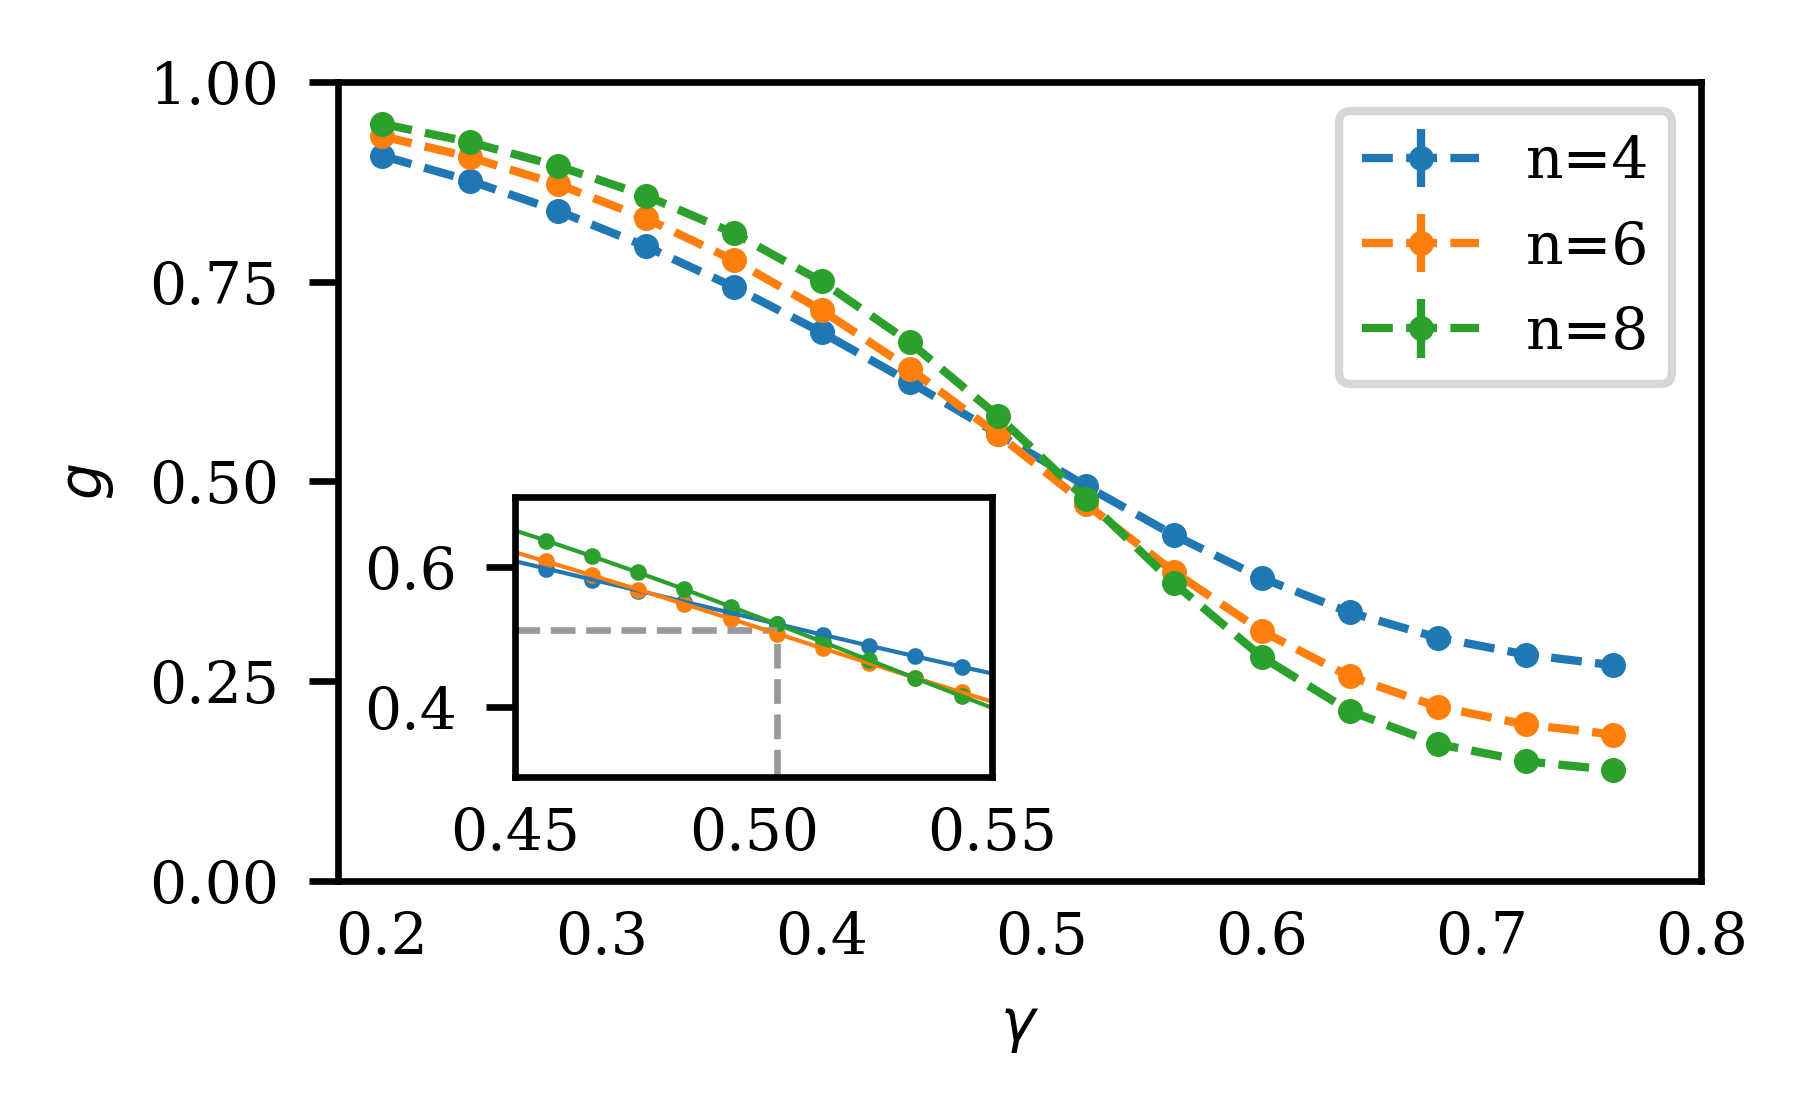

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define figure and main plot axis
fig, ax_main = plt.subplots(figsize=(figure_size_x / 2, figure_size_y / 2))

# Main plot
left_lim = 0
right_lim = -1

# ax_main.vlines(gamma_c, ymin=0, ymax=0.5, linestyles='--', colors=colors["grey"])
# ax_main.hlines(0.5, xmin=0.1, xmax=gamma_c, linestyles='--', colors=colors["grey"])

for n in [4, 6, 8]:
    ax_main.errorbar(gamma_range_binder[left_lim:right_lim], 
                 g_avg[n][left_lim:right_lim], 
                 g_std[n][left_lim:right_lim] / np.sqrt(num_random_models), 
                 fmt='.--', 
                 label=f'n={n}', 
                 alpha=1
                 )

# Set limits and labels on main plot
ax_main.set_xlim(0.18, 0.8)
ax_main.set_ylim(0, 1)
ax_main.set_yticks([0, 0.25, 0.5, 0.75, 1])
ax_main.set_xlabel('$\\gamma$')
ax_main.set_ylabel('$g$')
ax_main.legend()
fig.tight_layout()

# Define rectangle to indicate zoomed region on main plot
zoom_left_lim = 0.45
zoom_right_lim = 0.55

# Add inset axes for the zoomed-in region
inset_ax = ax_main.inset_axes([0.13, 0.13, 0.35, 0.35])  # [x_position, y_position, width, height]

# Zoomed-in plot on inset
inset_ax.vlines(gamma_c, ymin=0, ymax=0.5, linestyles='--', linewidth=0.8, colors=colors["grey"])
inset_ax.hlines(0.51, xmin=zoom_left_lim, xmax=gamma_c, linestyles='--', linewidth=0.8, colors=colors["grey"])

for n in [4, 6, 8]:
    inset_ax.plot(gamma_range_binder_refined[left_lim:right_lim], 
                  g_refined_avg[n][left_lim:right_lim], 
                  '-', 
                  alpha=1,
                  linewidth=0.5,
                  )
    inset_ax.scatter(gamma_range_binder_refined[left_lim:right_lim], 
                     g_refined_avg[n][left_lim:right_lim], 
                     alpha=1,
                     s=1,
                     )

# Set limits for inset
inset_ax.set_xlim(zoom_left_lim, zoom_right_lim)
inset_ax.set_ylim(0.3, 0.7)

# Customize ticks on the inset
inset_ax.set_xticks([0.45, np.round(gamma_c,2), 0.55])
# inset_ax.set_yticks([0.4, 0.5, 0.6])

# Draw rectangle and connecting lines between main plot and inset
# ax_main.indicate_inset_zoom(inset_ax, edgecolor="black")

plt.show()
fig.savefig(projectdir + 'figures/binder_cumulant')
fig.savefig(projectdir + 'figures/pdf_figures/binder_cumulant.pdf')

In [16]:
gamma_range_binder_refined

[0.35,
 0.3596774193548387,
 0.3693548387096774,
 0.3790322580645161,
 0.3887096774193548,
 0.39838709677419354,
 0.4080645161290323,
 0.41774193548387095,
 0.4274193548387097,
 0.43709677419354837,
 0.4467741935483871,
 0.4564516129032258,
 0.4661290322580645,
 0.47580645161290325,
 0.4854838709677419,
 0.49516129032258066,
 0.5048387096774194,
 0.5145161290322581,
 0.5241935483870968,
 0.5338709677419355,
 0.5435483870967742,
 0.5532258064516129,
 0.5629032258064517,
 0.5725806451612904,
 0.582258064516129,
 0.5919354838709678,
 0.6016129032258064,
 0.6112903225806452,
 0.620967741935484,
 0.6306451612903226,
 0.6403225806451613,
 0.65]